In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA.git


Cloning into 'ARIMA-And-Seasonal-ARIMA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
df=pd.read_csv('/content/ARIMA-And-Seasonal-ARIMA/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df['Month']=pd.to_datetime(df.Month)
df=df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales','Month':'ds'})
df.head()

,ds,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
idf=df.set_index('ds')
df.tail()

,ds,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


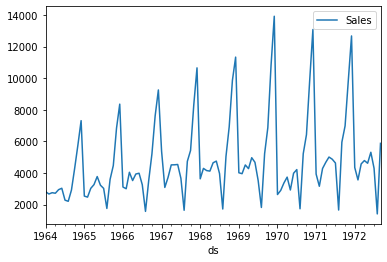

In [ ]:
idf.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])
test_result

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [ ]:
idf['first_awm_12']=idf['Sales'].diff(12)

In [ ]:
test_result_awm= adfuller(idf['first_awm_12'].dropna())
test_result_awm

(-7.626619157213164,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1294.7753384560438)

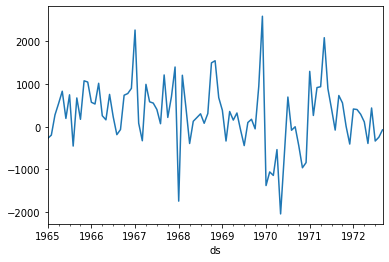

In [ ]:
idf['first_awm_12'].dropna().plot()

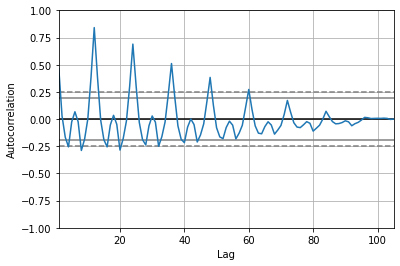

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

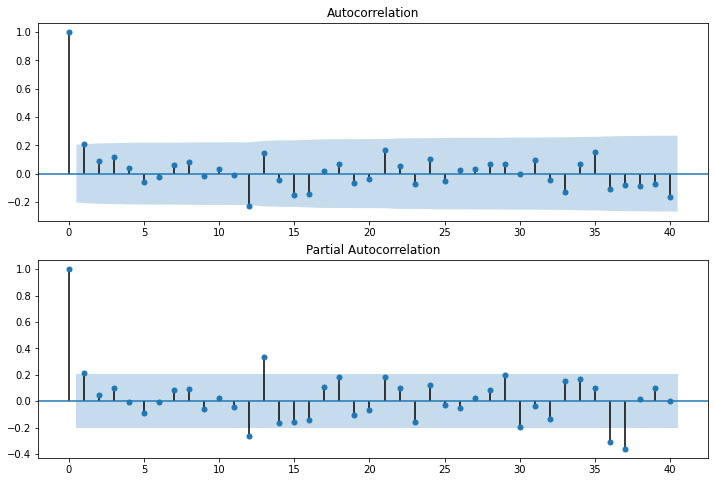

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(idf['first_awm_12'].iloc[13:],lags=40,ax=ax1)
ax1=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(idf['first_awm_12'].iloc[13:],lags=40,ax=ax1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

model=ARIMA(idf['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 11 Feb 2021   AIC                           1910.251
Time:                        17:41:29   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

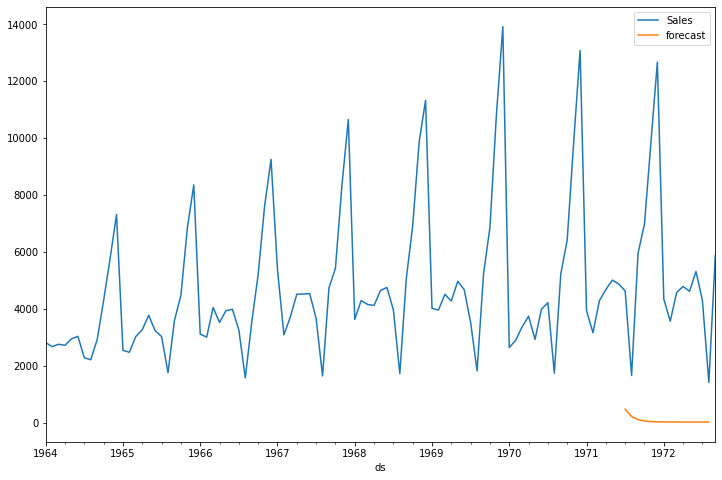

In [ ]:
idf['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
idf[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

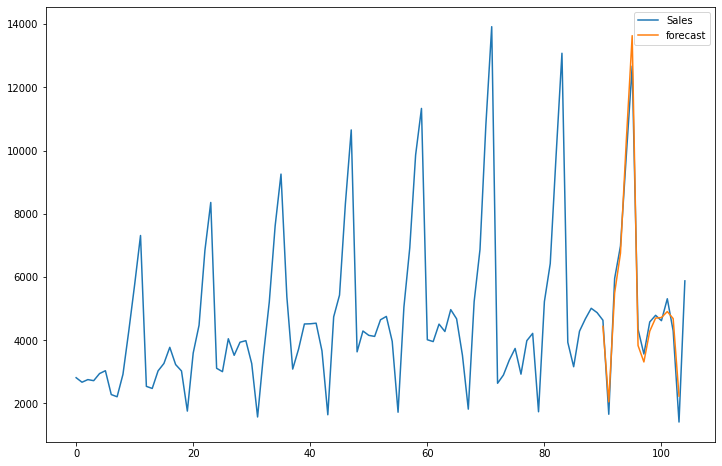

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))